In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('car_sales.csv')
df = raw_data.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
df['Brand'].count()

4345

In [8]:
df['Price'].isna().sum()

172

In [9]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Too many unique variables in Model. Brand, year, and engine volume will be fairly decent predictors of model anyway.

### Predicting the price ofa used car based on the specifications

In [ ]:
df = df.drop(columns='Model')

In [13]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


#### Missing Values

See these in price and engine volume

In [15]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [17]:
dfmv = df.dropna(axis=0)
dfmv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [18]:
df = dfmv.copy()

#### PDFs

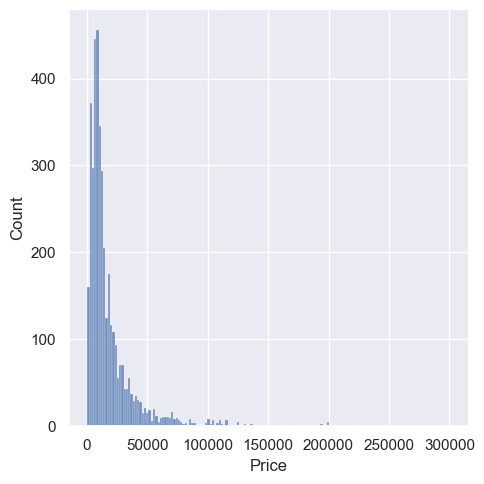

In [21]:
sns.displot(df['Price'])

Looks pretty exponential to me. Not surprising, really.

In [23]:
q = df['Price'].quantile(.99)
q

129812.51999999981

In [24]:
df_pout = df[df['Price']<q]
df_pout.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


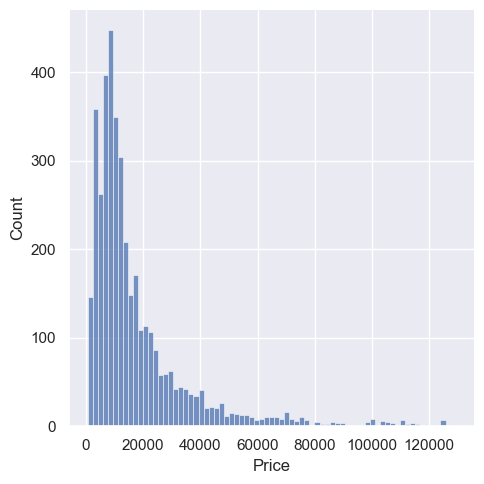

In [27]:
sns.displot(df_pout['Price'])

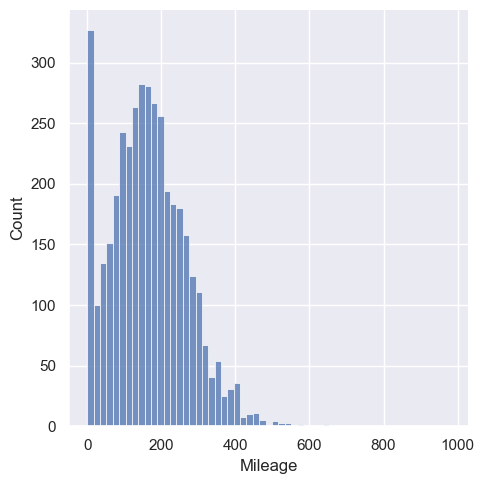

In [28]:
sns.displot(df_pout['Mileage'])

In [30]:
q = df['Mileage'].quantile(.99)
df_mout = df_mout[df_mout['Mileage']<q]
df_mout.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,19668.596878,159.892570,2.768489,2006.479669
std,25893.860852,96.633975,4.960538,6.616733
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.800000,2003.000000
50%,11500.000000,157.000000,2.200000,2008.000000
75%,21962.250000,227.000000,3.000000,2012.000000
max,300000.000000,433.000000,99.990000,2016.000000


In [31]:
df_mout.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


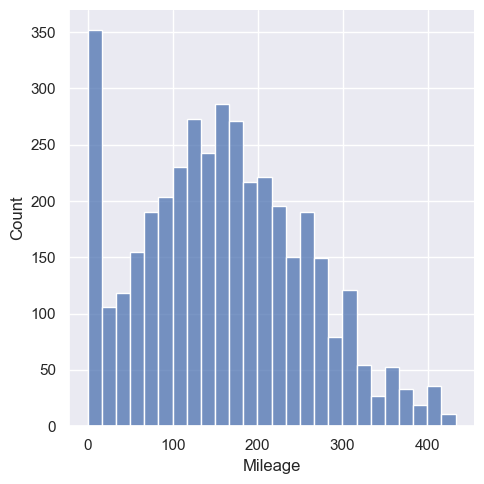

In [32]:
sns.displot(df_mout['Mileage'])

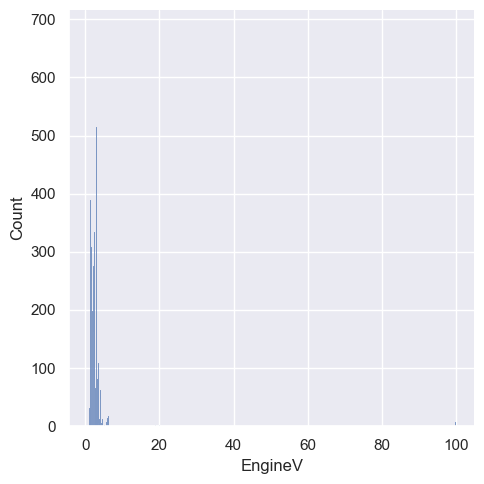

In [34]:
sns.displot(df_mout['EngineV'])

In [35]:
EngV = pd.DataFrame(df_mout['EngineV'])
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
2508,1.00
3627,1.00
804,1.00
...,...
3641,99.99
1311,99.99
3114,99.99
1264,99.99


In [36]:
df_vout = df_mout[df_mout['EngineV']<=6.5]

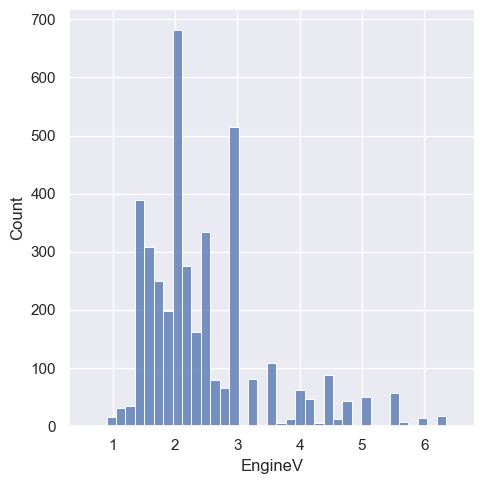

In [37]:
sns.displot(df_vout['EngineV'])

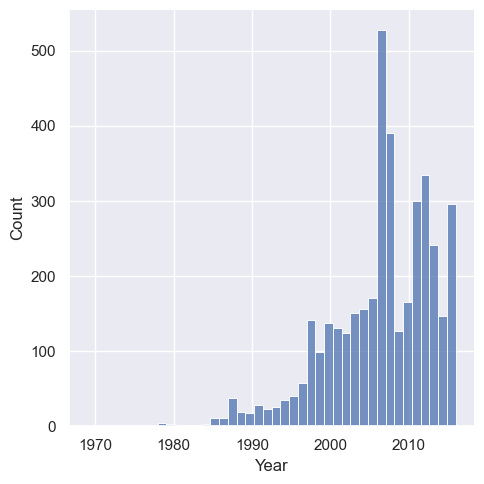

In [38]:
sns.displot(df_vout['Year'])

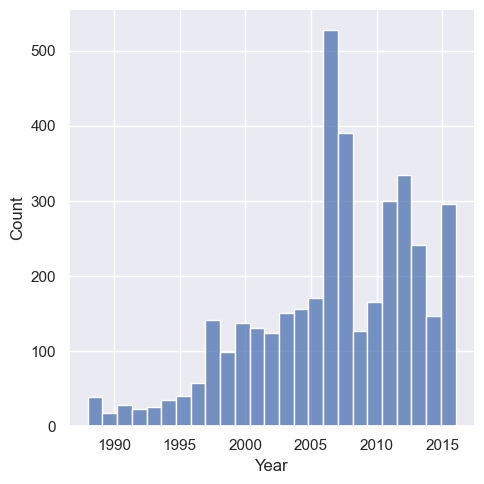

In [39]:
q = df_vout['Year'].quantile(0.01)
df_yout = df_vout[df_vout['Year']>q]
sns.displot(df_yout['Year'])

In [40]:
df_clean = df_yout.reset_index(drop=True)
df_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3908,3908.000000,3908,3908.000000,3908.000000,3908,3908,3908.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1473,NaN,NaN,1815,3546,NaN
mean,NaN,19964.668401,NaN,158.929632,2.475801,NaN,NaN,2006.798362
std,NaN,26046.690402,NaN,96.230380,0.980810,NaN,NaN,6.126537
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7286.750000,NaN,89.750000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [41]:
df = df_clean.copy()

In [42]:
df['Price'].max()

300000.0

In [43]:
q = df['Price'].quantile(.99)
df_pout = df[df['Price']<q]

In [44]:
df_pout['Price'].max()

129222.0

In [45]:
df_clean = df_pout.reset_index(drop=True)
df_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18201.955032,NaN,160.471425,2.451293,NaN,NaN,2006.713473
std,NaN,19086.956320,NaN,95.531340,0.951521,NaN,NaN,6.100481
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Good job I checked that!

In [46]:
df = df_clean.copy()

#### Checking OLS Assumptions